# Pymaceuticals Inc. Medication Analysis

Analysis:
1. Of the 4 treatments analyzed for final tumor volume (Capomulin, Ramicane, Infubinol, Ceftamin), Capomulin and Ramicane had the lowest average final volumes.
2. The average volume of the tumors were also taken for every single treatment. Among every treatment, Capomulin and Ramicane again had the lowest average volume. However, that data includes volumes taken at numerous timepoints. So it may not be as indicitive of treatment effectiveness, especially for early timepoints where treatment may not have taken effect yet. 
3. The correlation coefficient between mouse weight and average tumor volume is .84, which indicates a fairly strong and postive correlation.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [27]:
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Check for number of mice
mouse_amount = len(combined_df['Mouse ID'].unique())
mouse_amount

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ID = duplicate_df['Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_df[combined_df['Mouse ID'] == 'g989']
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ID) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
clean_mouse_amount = len(clean_df['Mouse ID'].unique())
clean_mouse_amount

248

# Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_vol_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': med_tumor_vol,
    'Tumor Volume Variance': var_tumor_vol,
    'Tumor Volume Std. Dev.': std_tumor_vol,
    'Tumor Volume Std. Err.': sem_tumor_vol
})
tumor_vol_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
).reset_index()

agg_tumor_vol

,Drug Regimen,mean,median,variance,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


# Bar and Pie Charts

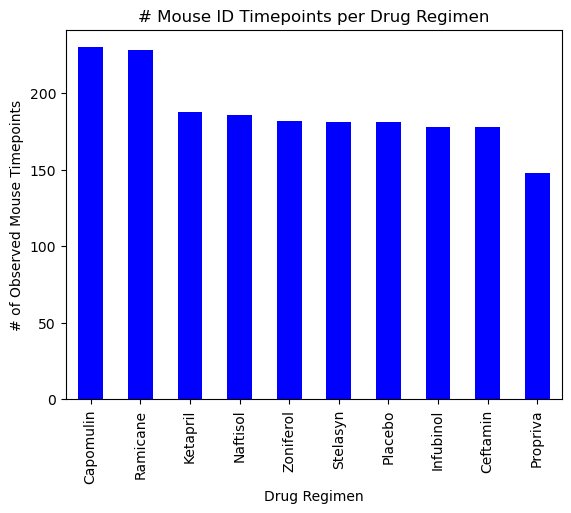

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Count rows for each drug regimen
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create bar plit using pandas
regimen_bar = regimen_counts.plot(kind='bar', color='blue')

regimen_bar.set_title("# Mouse ID Timepoints per Drug Regimen")
regimen_bar.set_xlabel("Drug Regimen")
regimen_bar.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

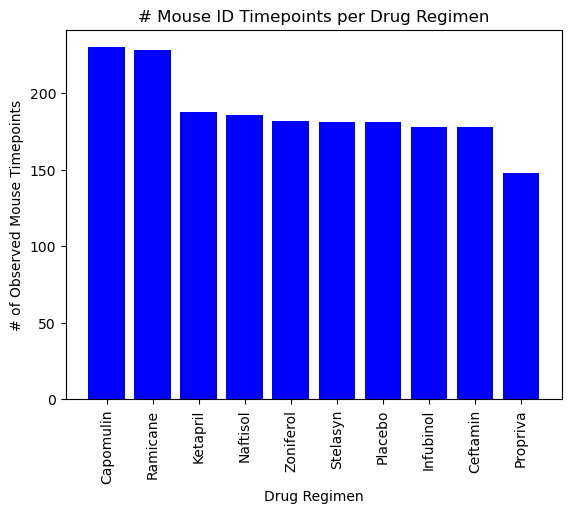

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set x axis
x_axis = regimen_counts.index

plt.bar(x_axis, regimen_counts, color='blue')

# Set labels
plt.title("# Mouse ID Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate x axis labels vertically
plt.xticks(rotation=90)

plt.show()

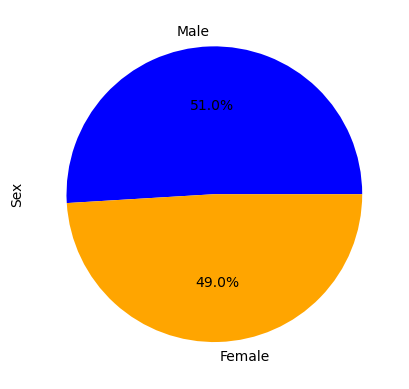

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_df['Sex'].value_counts()

sex_pie = sex_distribution.plot(kind='pie', colors=['blue', 'orange'], autopct = "%1.1f%%")
sex_pie.set_ylabel("Sex")

plt.show()

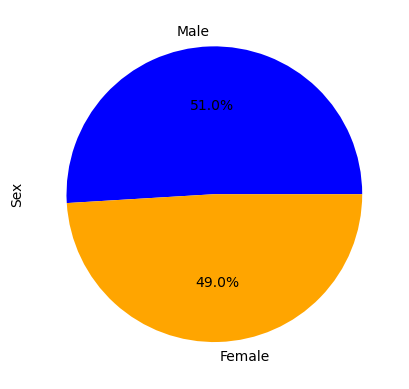

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, colors=['blue', 'orange'], autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

# Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = last_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(last_timepoints_df, clean_df, on=['Mouse ID', 'Timepoint'])

In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == treatment]
    
    # add subset
    tumor_vol_data.append(treatment_df)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
     # Determine outliers using upper and lower bounds
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


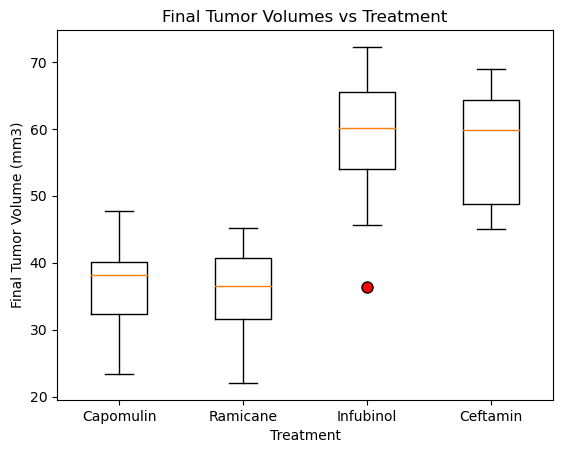

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Get data for each specific treatment
capomulin_data = tumor_vol_data[0]['Tumor Volume (mm3)'].tolist()
ramicane_data = tumor_vol_data[1]['Tumor Volume (mm3)'].tolist()
infubinol_data = tumor_vol_data[2]['Tumor Volume (mm3)'].tolist()
ceftamin_data = tumor_vol_data[3]['Tumor Volume (mm3)'].tolist()

# Create plot
red_dot = dict(marker='o', markerfacecolor='r', markersize=8)

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Treatment")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Final Tumor Volumes vs Treatment")
ax1.boxplot([capomulin_data, ramicane_data, infubinol_data, ceftamin_data], flierprops = red_dot)
ax1.set_xticklabels(treatments)

plt.show()

# Line and Scatter Plots

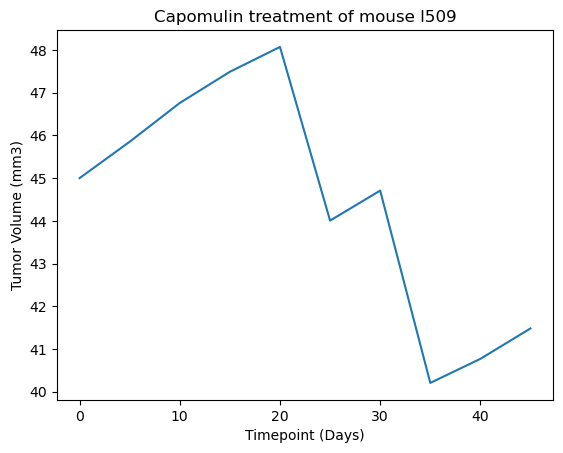

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == "l509")]

plt.plot(capomulin_line_data['Timepoint'], capomulin_line_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

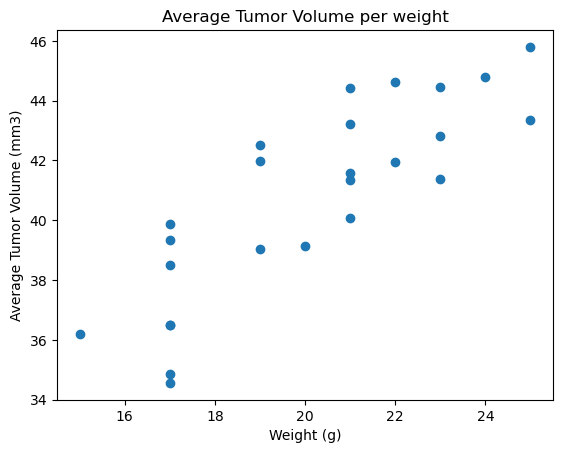

In [86]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].groupby("Mouse ID")
avg_tumor_vol_cap = all_capomulin['Tumor Volume (mm3)'].mean()
mouse_weight = all_capomulin['Weight (g)'].unique()

plt.scatter(mouse_weight, avg_tumor_vol_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per weight")

plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


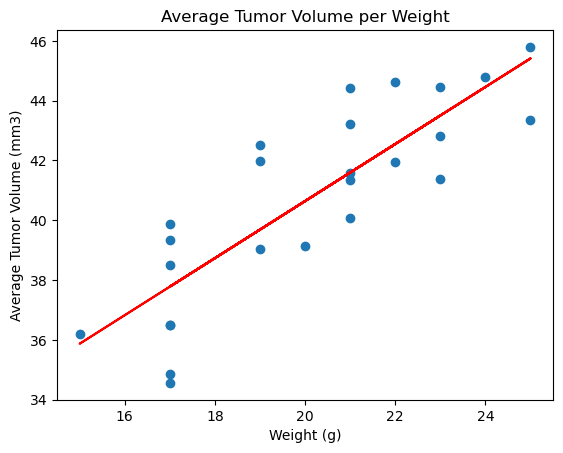

In [106]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight_list = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight_list, avg_tumor_vol_cap)[0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight_list, avg_tumor_vol_cap)
regress_values = mouse_weight_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight_list, avg_tumor_vol_cap)
plt.plot(mouse_weight_list, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume per Weight")

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
plt.show()